### Based on the data predict if the person is walking or running using SVM, Logistic_regression, Naive_Bayes

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('run_or_walk.csv')
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
df.shape

(88588, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
df.describe(include='object')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


As the 1st three columns are not of much important to us in predicting the results, dropping off

In [6]:
df = df.drop(columns=['date','time', 'username'], axis = 1)

In [7]:
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [8]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [9]:
df.activity.unique()

array([0, 1], dtype=int64)

In [10]:
df.wrist.unique()

array([0, 1], dtype=int64)

In [11]:
df.wrist.value_counts()

wrist
1    46258
0    42330
Name: count, dtype: int64

In [12]:
df.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

##### based on the above data, we can understand that activity is out label column, 0 means either walking or running and vice-versa

In [13]:
y = df.activity

In [14]:
X=df.drop('activity', axis = 1)

In [15]:
X.shape, y.shape

((88588, 7), (88588,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X = scaler.fit_transform(X)

In [19]:
X

array([[-1.04536822,  0.33668266, -0.33231618, ..., -0.05039065,
        -0.00392358, -1.5419494 ],
       [-1.04536822,  0.74013342, -0.85156246, ..., -0.14349622,
        -0.013684  ,  0.05462392],
       [-1.04536822,  0.50997229, -1.39586742, ..., -0.72973418,
         0.05764218, -1.28448139],
       ...,
       [-1.04536822,  0.52859919, -0.93463579, ..., -1.16015794,
        -0.26395131, -0.67066385],
       [-1.04536822,  0.3307379 , -0.44895295, ..., -1.21321296,
         0.34937044, -0.93910129],
       [-1.04536822,  0.3852315 , -0.36177911, ...,  0.09106279,
         0.87409756,  0.65768097]])

In [20]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62011, 7)
(62011,)
(26577, 7)
(26577,)


## Support Vector Machine

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()

In [25]:
svm_model.fit(X_train, y_train)

SVC()

In [26]:
y_pred = svm_model.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.9914587801482485

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13374
           1       0.99      0.99      0.99     13203

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



<Axes: >

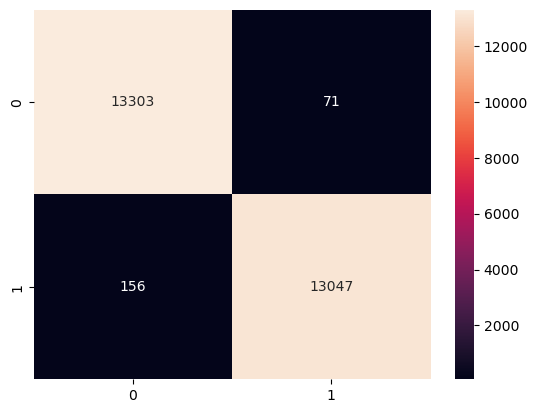

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '0.5g')

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logReg = LogisticRegression()

In [32]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_predict = logReg.predict(X_test)

In [34]:
accuracy_score(y_test, y_predict)

0.8633781088911465

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13374
           1       0.90      0.82      0.86     13203

    accuracy                           0.86     26577
   macro avg       0.87      0.86      0.86     26577
weighted avg       0.87      0.86      0.86     26577



## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_model = GaussianNB()

In [38]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [39]:
nb_pred = nb_model.predict(X_test)

In [40]:
accuracy_score(y_test, nb_pred)

0.9576701659329495

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_model = DecisionTreeClassifier()

In [43]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
dt_pred = dt_model.predict(X_test)

In [45]:
accuracy_score(y_test, dt_pred)

0.9857395492343003

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rf_pred = rf_model.predict(X_test)

In [50]:
accuracy_score(y_test, rf_pred)

0.9927004552808819

From the above set of models, we can see that Random forest and SVM are the ones with highest accuracy score

In [51]:
import joblib

In [52]:
import pickle

In [53]:
with open('support_vector_classifier.pkl', 'wb') as model_file:
    joblib.dump(svm_model, model_file)

In [54]:
with open('Naive_bayes_classifier.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

In [55]:
with open('Logistic_regression.pkl', 'wb') as model_file:
    joblib.dump(logReg, model_file)

In [56]:
with open('decision_tree_classifier.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)

In [57]:
with open('random_forest_classifier.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)